In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.ticker as ticker
tags_df = pd.read_csv("physics_csv/Votes.csv")


In [4]:
## Distribution for each column

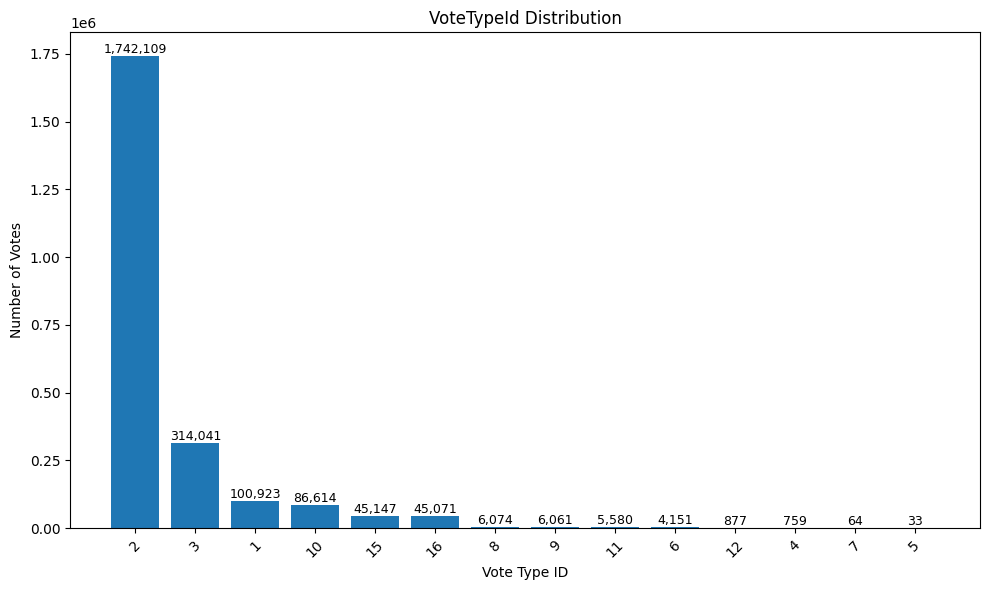

In [5]:
#VoteTypeId
tags_df["VoteTypeId"].value_counts()

vt_counts = tags_df["VoteTypeId"].value_counts().sort_values(ascending=False)

plt.figure(figsize=(10, 6))
bars = plt.bar(vt_counts.index.astype(str), vt_counts.values)
plt.title("VoteTypeId Distribution")
plt.xlabel("Vote Type ID")
plt.ylabel("Number of Votes")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle=' ', alpha=0.7)

# add exact value to each bar
for idx, value in enumerate(vt_counts.values):
    plt.text(idx, value, f'{value:,}', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

count    599635.000000
mean          3.931565
std           7.620169
min           1.000000
25%           1.000000
50%           2.000000
75%           4.000000
90%           7.000000
95%          11.000000
99%          30.000000
max         865.000000
Name: VoteCount, dtype: float64

 Top 10 most voted posts:
PostId
5510      865
121932    852
5265      831
136861    593
111238    554
121879    545
111006    503
14752     502
937       495
3177      423
Name: VoteCount, dtype: int64


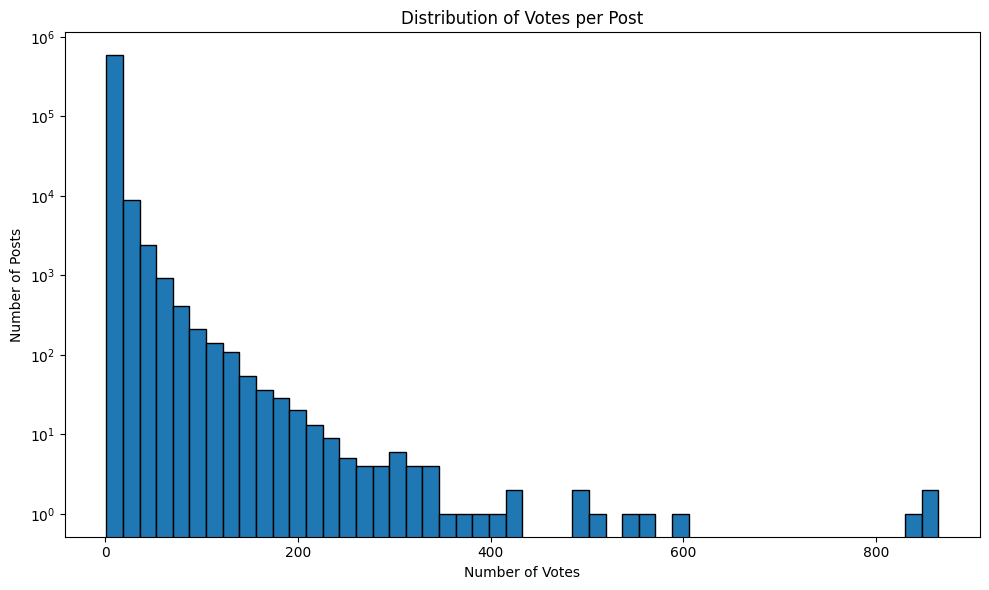

In [21]:
#PostId
votes_per_post = tags_df["PostId"].value_counts()

votes_per_post.name = "VoteCount"

# Summary statistics for votes per post:
print(votes_per_post.describe(percentiles=[.25, .5, .75, .9, .95, .99]))

# Top 10 most voted posts:
print("\n Top 10 most voted posts:")
print(votes_per_post.head(10))

# log Y -> right skewed
plt.figure(figsize=(10, 6))
plt.hist(votes_per_post, bins=50, edgecolor='black')
plt.yscale('log', base=10)
plt.gca().yaxis.set_minor_locator(ticker.NullLocator())  # 关闭次刻度点点
plt.title("Distribution of Votes per Post")
plt.xlabel("Number of Votes")
plt.ylabel("Number of Posts")

plt.tight_layout()
plt.show()

Date range: 2010-08-24 00:00:00 → 2024-03-31 00:00:00
Unique dates: 4904


<Axes: title={'center': 'Daily vote counts'}, xlabel='CreationDate'>

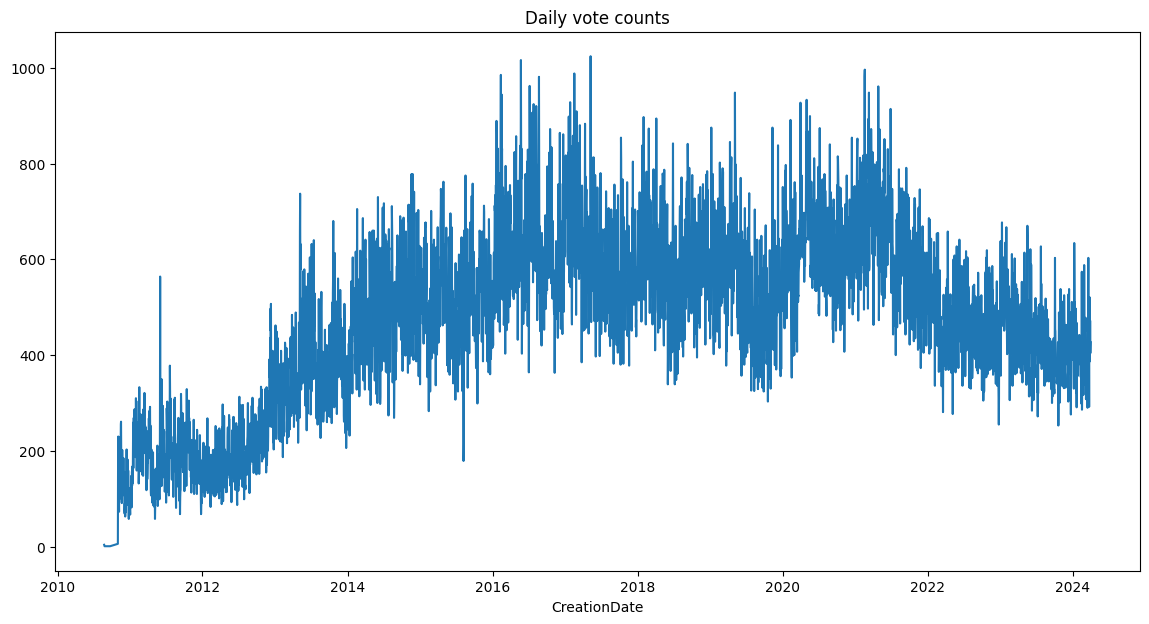

In [7]:
# Date
tags_df["CreationDate"] = pd.to_datetime(tags_df["CreationDate"])
print("Date range:", tags_df["CreationDate"].min(), "→", tags_df["CreationDate"].max())
print("Unique dates:", tags_df["CreationDate"].dt.date.nunique())

tags_df["CreationDate"].dt.date.value_counts().sort_index().plot(figsize=(14, 7), title="Daily vote counts")


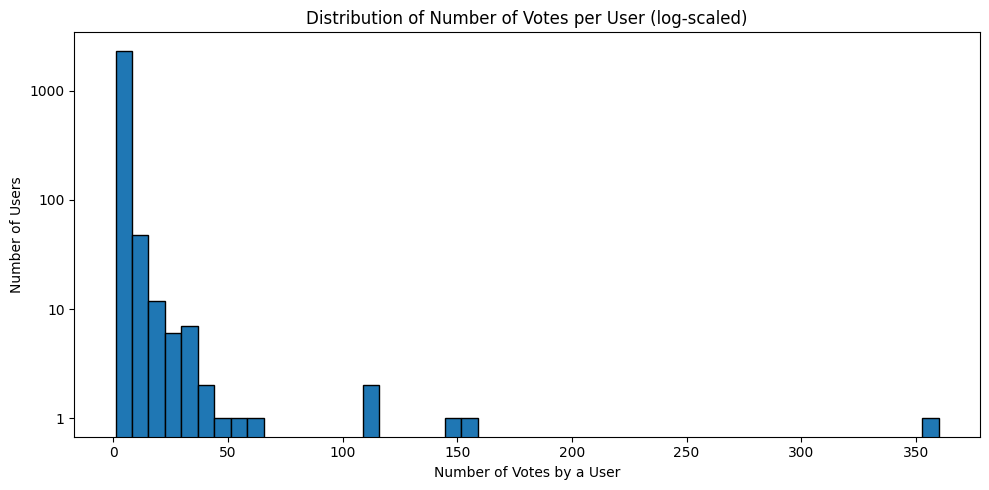

In [15]:
#UserId
user_vote_counts = tags_df["UserId"].dropna().value_counts()

plt.figure(figsize=(10, 5))
plt.hist(user_vote_counts, bins=50, log=True, edgecolor='black')
plt.title("Distribution of Number of Votes per User (log-scaled)")
plt.xlabel("Number of Votes by a User")
plt.ylabel("Number of Users")

plt.grid(False)
plt.yscale('log', base=10)
plt.gca().yaxis.set_minor_locator(ticker.NullLocator())  # 关闭次刻度点点
plt.gca().yaxis.set_major_formatter(ticker.FuncFormatter(lambda y, _: f'{int(y)}'))
plt.tight_layout()
plt.show()


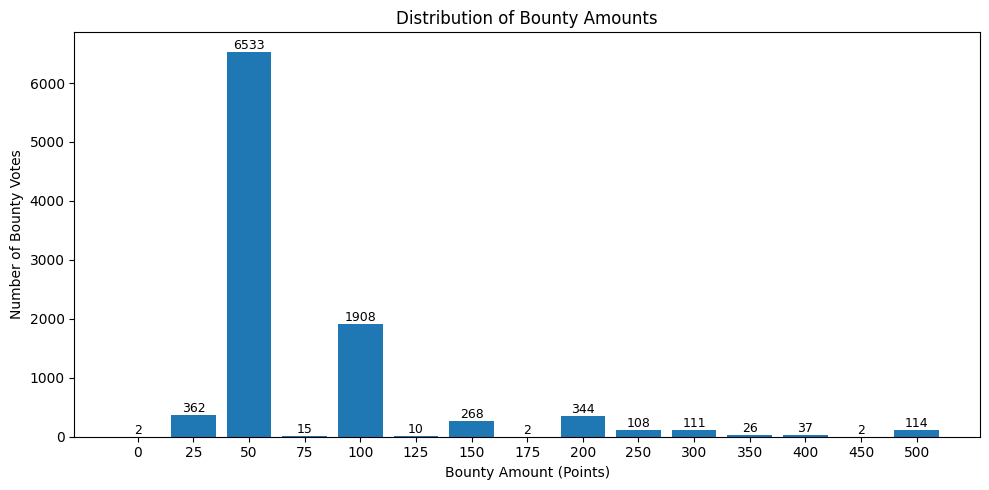

In [34]:
# Bounty Amounts
bounty_counts = tags_df["BountyAmount"].dropna().value_counts().sort_index()

plt.figure(figsize=(10, 5))
bars = plt.bar(bounty_counts.index.astype(int).astype(str), bounty_counts.values)
plt.title("Distribution of Bounty Amounts")
plt.xlabel("Bounty Amount (Points)")
plt.ylabel("Number of Bounty Votes")
plt.grid(axis='y', linestyle=' ', alpha=0.7)

# add exact value to each bar
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width() / 2, height, f'{int(height)}',
             ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()


In [ ]:
#################feature overview#################
# Preview
print("Head of the table:")
print(tags_df.head(), end="\n\n")

# Data types
print("Data Types:")
print(tags_df.dtypes, end="\n\n")

# Missing values
print("Missing Values:")
print(tags_df.isnull().sum(), end="\n\n")

# Unique values
print("Unique Value Counts:")
for col in tags_df.columns:
    print(f"{col}: {tags_df[col].nunique()} unique values")

🔹 Head of the table:
   Id  PostId  VoteTypeId             CreationDate  UserId  BountyAmount
0   1       1           2  2010-11-02T00:00:00.000     NaN           NaN
1   2       1           2  2010-11-02T00:00:00.000     NaN           NaN
2   3       1           2  2010-11-02T00:00:00.000     NaN           NaN
3   9       1           2  2010-11-02T00:00:00.000     NaN           NaN
4  17       1           2  2010-11-02T00:00:00.000     NaN           NaN

🔹 Data Types:
Id                int64
PostId            int64
VoteTypeId        int64
CreationDate     object
UserId          float64
BountyAmount    float64
dtype: object

🔹 Missing Values:
Id                    0
PostId                0
VoteTypeId            0
CreationDate          0
UserId          2351397
BountyAmount    2347662
dtype: int64

🔹 Unique Value Counts:
Id: 2357504 unique values
PostId: 599635 unique values
VoteTypeId: 14 unique values
CreationDate: 4904 unique values
UserId: 2412 unique values
BountyAmount: 15 unique 